In [1]:
import numpy as np
import librosa
import os
import pandas as pd
from os import walk
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

**Variable des fichiers**

In [2]:
# Fichiers pour voir les 10 accords les plus fréquents jouer par une guitare

sound_fileA = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Amaj_101.wav"
sound_fileAmin = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Amin_101.wav"
sound_fileBm = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Bmin_101.wav"
sound_fileC = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Cmaj_101.wav"
sound_fileD = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Dmaj_101.wav"
sound_fileDmin = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Dmin_101.wav"
sound_fileE = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Emaj_101.wav"
sound_fileEm = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Emin_101.wav"
sound_fileF = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Fmaj_101.wav"
sound_fileG = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_gmaj_101.wav"

In [3]:
#Fichiers pour comparer les 2 guitares

sound_fileA = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Amaj_101.wav"
sound_fileAbis = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Amaj_1.wav"

In [4]:
# Fichiers pour comparer les instruments

guitar_file = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\G_Amaj_101.wav"
flute_file = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\wav_autres\F_Amaj_0.wav"
piano_file = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\wav_autres\P_Amaj_0.wav"
violin_file = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\wav_autres\V_Amaj_0.wav"

**Fonction pour obtenir la PCP**

In [5]:
def get_chroma_vector(wav_file_path, target_duration=3):
    y, sr = librosa.load(wav_file_path, sr=None)
  
    chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
    df_chroma = pd.DataFrame(chroma)
    moyenne_par_colonne = df_chroma.mean()
    # Sélectionnez les colonnes dont la moyenne est inférieure ou égale à 0.6
    colonnes_a_conserver = moyenne_par_colonne[moyenne_par_colonne <= 0.65].index

    # Créez un nouveau DataFrame en ne conservant que les colonnes sélectionnées
    df_filtered = df_chroma[colonnes_a_conserver]
    new_chroma = df_filtered.to_numpy()
    return new_chroma

**Affichage chromagramme des 10 accords**

In [7]:
files = [sound_fileA,sound_fileAmin,sound_fileBm,sound_fileC,sound_fileD,sound_fileDmin,sound_fileE,sound_fileEm,sound_fileF,sound_fileG]
chroma = []

for file in files:
    chroma.append(get_chroma_vector(file))

most_frq_chords = ['Amaj','Amin','Bmin','Cmaj','Dmaj','Dmin','Emaj','Emin','Fmaj','Gmaj']

# Crée la figure en dehors de la boucle
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i in range(2):
    for j in range(4):
        # Utilise un indice pour accéder à chaque élément de chroma
        val = chroma[i * 4 + j]
        img = librosa.display.specshow(val, y_axis='chroma', x_axis='time', ax=axes[i, j])
        fig.colorbar(img, ax=axes[i, j])
        axes[i, j].set_title(most_frq_chords[i * 4 + j] + ' chromagram')

# Ajoute des titres, labels, etc. si nécessaire
fig.suptitle('10 most frequent chromagram chords')
plt.tight_layout()
plt.show()


C:\Users\lucie\AppData\Local\Temp\ipykernel_20008\2326105373.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(wav_file_path, sr=None)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lucie\\Documents\\Programmation\\PFE_Analayse_musicale\\Chords_generation\\chords_wav\\G_Amaj_101.wav'

**Affichage des chromagrammes des 2 guitares**

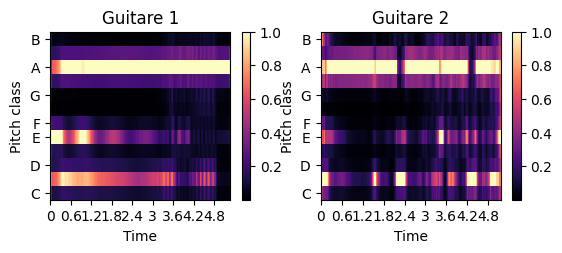

In [ ]:

plt.subplot(221)
img = librosa.display.specshow(get_chroma_vector(sound_fileA), y_axis='chroma', x_axis='time')
plt.title('Guitare 1')
fig.colorbar(img)

plt.subplot(222)
img2 = librosa.display.specshow(get_chroma_vector(sound_fileAbis), y_axis='chroma', x_axis='time')
plt.title('Guitare 2')
fig.colorbar(img2)

plt.tight_layout()
plt.show()


**Affichage des chromagrammes des 4 instruments**

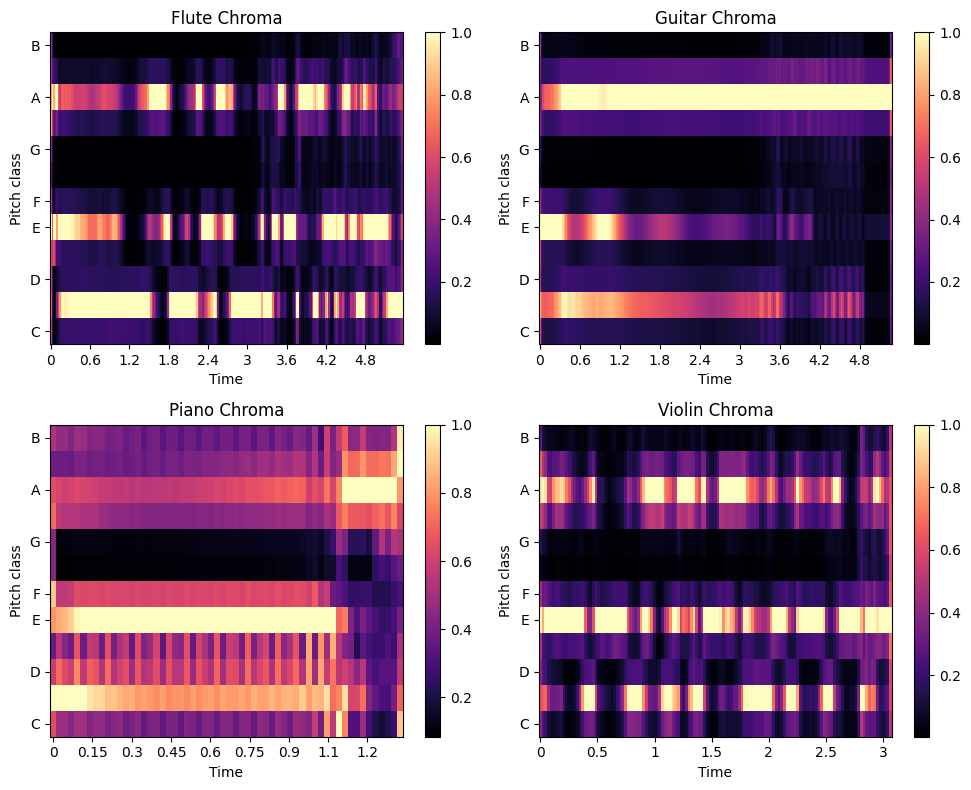

In [ ]:
# Obtenez les 4 chromagrammes (remplacez ces lignes par les données réelles que vous avez)
chroma1 = get_chroma_vector(flute_file)
chroma2 = get_chroma_vector(guitar_file)
chroma3 = get_chroma_vector(piano_file)
chroma4 = get_chroma_vector(violin_file)

# Créez une figure avec une grille de 2x2 sous-plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Affichez chaque chromagramme dans un sous-plot
img1 = librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time', ax=axes[0, 0])
axes[0, 0].set_title('Flute Chroma')

img2 = librosa.display.specshow(chroma2, y_axis='chroma', x_axis='time', ax=axes[0, 1])
axes[0, 1].set_title('Guitar Chroma')

img3 = librosa.display.specshow(chroma3, y_axis='chroma', x_axis='time', ax=axes[1, 0])
axes[1, 0].set_title('Piano Chroma')

img4 = librosa.display.specshow(chroma4, y_axis='chroma', x_axis='time', ax=axes[1, 1])
axes[1, 1].set_title('Violin Chroma')

# Ajoutez une barre de couleur pour chaque sous-plot
fig.colorbar(img1, ax=axes[0, 0])
fig.colorbar(img2, ax=axes[0, 1])
fig.colorbar(img3, ax=axes[1, 0])
fig.colorbar(img4, ax=axes[1, 1])

# Ajustez l'espacement entre les sous-plots
plt.tight_layout()

# Affichez la figure
plt.show()


**Fonctions de normalisation et de recupération de la moyenne**

In [ ]:
def normalize_pcp(pcp):
    total_energy = np.sum(pcp)
    normalized_pcp = pcp / total_energy
    return normalized_pcp

In [ ]:
def get_feature(file_path):
 # Extracting chroma vector feature
  chroma = get_chroma_vector(file_path)
  norm_chroma= normalize_pcp(chroma)
  chroma_mean = norm_chroma.mean(axis=1)

  feature = chroma_mean
  return feature

**Affichage moyenne des chroma des 10 accords**

In [ ]:
chroma_mean = []
for file in files:
    chroma_mean.append(get_feature(file))

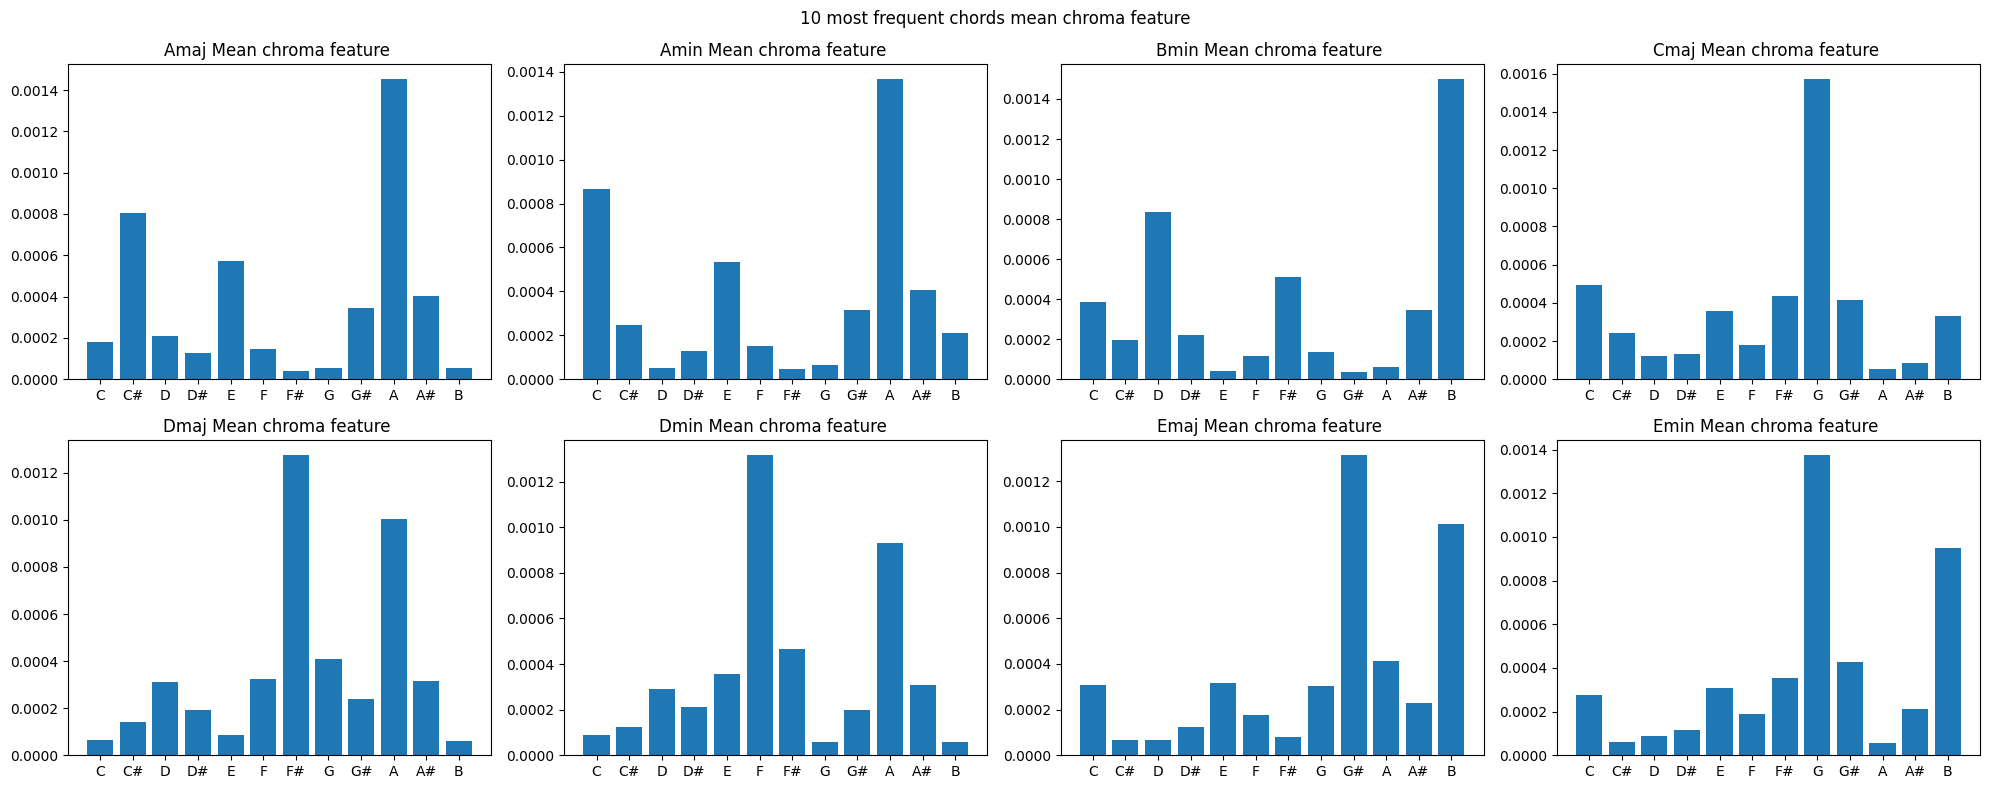

In [ ]:
# Crée la figure en dehors de la boucle
names = ['C', 'C#', 'D','D#','E','F','F#','G','G#','A','A#','B'] # nom des barres
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i in range(2):
    for j in range(4):
        # Utilise un indice pour accéder à chaque ensemble de données dans chroma_data
        data = chroma_mean[i * 4 + j]

        # Crée un bar chart
        axes[i, j].bar(names, data)  # Remplace 'blue' par la couleur de ton choix

        # Ajoute des titres, labels, etc. si nécessaire
        axes[i, j].set_title(f'{most_frq_chords[i * 4 + j]} Mean chroma feature ')

# Ajoute un titre global
fig.suptitle('10 most frequent chords mean chroma feature')

# Ajuste l'espacement entre les sous-graphiques
plt.tight_layout()

# Affiche la figure entière
plt.show()


**Affichage moyenne des chroma des 2 guitares**

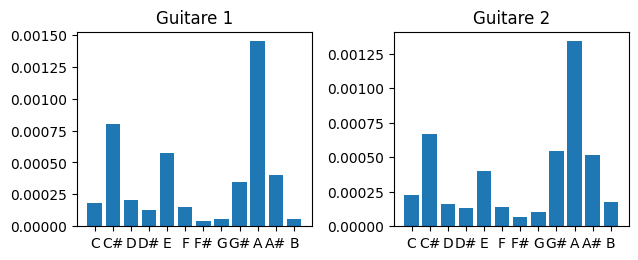

In [ ]:
plt.subplot(221)
plt.bar(names, get_feature(sound_fileA))
plt.title('Guitare 1')
fig.colorbar(img)

plt.subplot(222)
plt.bar(names, get_feature(sound_fileAbis))
plt.title('Guitare 2')
fig.colorbar(img2)

plt.tight_layout()

plt.show()

**Affichage moyenne des chroma des 4 instruments**

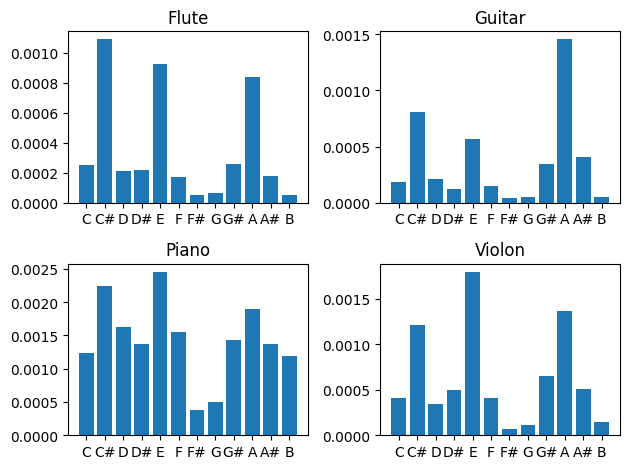

In [ ]:
names = ['C', 'C#', 'D','D#','E','F','F#','G','G#','A','A#','B'] # nom des barres

values_f = get_feature(flute_file).tolist()
values_g = get_feature(guitar_file).tolist()
values_p = get_feature(piano_file).tolist()
values_v = get_feature(violin_file).tolist()

plt.subplot(221)
plt.bar(names, values_f)
plt.title('Flute')

plt.subplot(222)
plt.bar(names, values_g)
plt.title('Guitar')

plt.subplot(223)
plt.bar(names, values_p)
plt.title('Piano')

plt.subplot(224)
plt.bar(names, values_v)
plt.title('Violon')

plt.tight_layout()
plt.show()
